<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/4_Clustering_Antarctic_Penguin_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 - Clustering Antarctic Penguin Species

## Project Description

Delve into the information about penguins by utilizing unsupervised learning techniques on a thoughtfully curated dataset. Uncover concealed patterns, clusters, and relationships that exist within the dataset.

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Unfortunately, they have not been able to record the species of penguin, but they know that there are at least three species that are native to the region: Adelie, Chinstrap, and Gentoo. Your task is to apply your data science skills to help them identify groups in the dataset!



## Imports

In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer

from kneed import KneeLocator

## Data

In [3]:
data_base_url = 'https://drive.google.com/uc?id='

In [4]:
id = '1s2Pn1NCG8Zpa852Vmnq-zFI-nGPi7SzJ'

penguins = pd.read_csv(data_base_url + id, index_col=0)
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
index,,,,,
0,39.1,18.7,181,3750,MALE
1,39.5,17.4,186,3800,FEMALE
2,40.3,18.0,195,3250,FEMALE
3,36.7,19.3,193,3450,FEMALE
4,39.3,20.6,190,3650,MALE
...,...,...,...,...,...
327,47.2,13.7,214,4925,FEMALE
328,46.8,14.3,215,4850,FEMALE
329,50.4,15.7,222,5750,MALE


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    int64  
 3   body_mass_g        332 non-null    int64  
 4   sex                332 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 15.6+ KB


## Preprocessing

In [6]:
cat_pipeline = make_pipeline(OneHotEncoder(drop='first'))
num_pipeline = make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
])

penguins_array = preprocessing.fit_transform(penguins)
penguins_array

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  1.        ],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747,  0.        ],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343,  0.        ],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  1.        ],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768,  0.        ],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  1.        ]])

In [7]:
penguins = pd.DataFrame(penguins_array, columns=preprocessing.get_feature_names_out())
penguins

,num__culmen_length_mm,num__culmen_depth_mm,num__flipper_length_mm,num__body_mass_g,cat__sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,1.0
1,-0.830434,0.126187,-1.068577,-0.504847,0.0
2,-0.683490,0.432728,-0.426399,-1.187953,0.0
3,-1.344738,1.096901,-0.569105,-0.939551,0.0
4,-0.867170,1.761074,-0.783164,-0.691149,1.0
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,0.0
328,0.510432,-1.457611,1.000662,0.799264,0.0
329,1.171681,-0.742347,1.500134,1.917074,1.0
330,0.216543,-1.202160,0.786603,1.233968,0.0


## Detect Optimal Number of Clusters

In [8]:
inertia = []
cluster_sizes = np.arange(1, 10)

for k in cluster_sizes:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(penguins)
    inertia.append(model.inertia_)

knee_locator = KneeLocator(cluster_sizes, inertia, curve='convex', direction='decreasing')
elbow_k = knee_locator.elbow
elbow_k

3

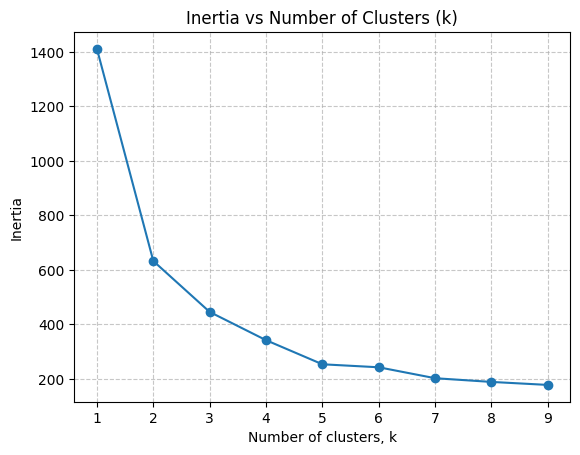

In [9]:
plt.plot(cluster_sizes, inertia, marker='o')

plt.title('Inertia vs Number of Clusters (k)')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(cluster_sizes)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## KMeans with 4 clusters

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(penguins)
cluster

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,

In [11]:
penguins['cluster'] = cluster.astype(str)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__culmen_length_mm   332 non-null    float64
 1   num__culmen_depth_mm    332 non-null    float64
 2   num__flipper_length_mm  332 non-null    float64
 3   num__body_mass_g        332 non-null    float64
 4   cat__sex_MALE           332 non-null    float64
 5   cluster                 332 non-null    object 
dtypes: float64(5), object(1)
memory usage: 15.7+ KB


In [12]:
# clean the column names
penguins.columns = [col.split('__', 1)[-1] for col in penguins.columns]
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,-0.903906,0.790360,-1.425342,-0.566948,1.0,2
1,-0.830434,0.126187,-1.068577,-0.504847,0.0,2
2,-0.683490,0.432728,-0.426399,-1.187953,0.0,2
3,-1.344738,1.096901,-0.569105,-0.939551,0.0,2
4,-0.867170,1.761074,-0.783164,-0.691149,1.0,2
...,...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,0.0,1
328,0.510432,-1.457611,1.000662,0.799264,0.0,1
329,1.171681,-0.742347,1.500134,1.917074,1.0,3
330,0.216543,-1.202160,0.786603,1.233968,0.0,1


## Visualize the clusters

In [13]:
penguins_melted = penguins.melt(
    id_vars=['sex_MALE', 'cluster'],
    value_vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    var_name='feature',
    value_name='value'
)

penguins_melted['cluster'] = pd.Categorical(penguins_melted['cluster'],
                                            categories=sorted(penguins_melted['cluster'].unique()))

penguins_melted

,sex_MALE,cluster,feature,value
0,1.0,2,culmen_length_mm,-0.903906
1,0.0,2,culmen_length_mm,-0.830434
2,0.0,2,culmen_length_mm,-0.683490
3,0.0,2,culmen_length_mm,-1.344738
4,1.0,2,culmen_length_mm,-0.867170
...,...,...,...,...
1323,0.0,1,body_mass_g,0.892415
1324,0.0,1,body_mass_g,0.799264
1325,1.0,3,body_mass_g,1.917074
1326,0.0,1,body_mass_g,1.233968


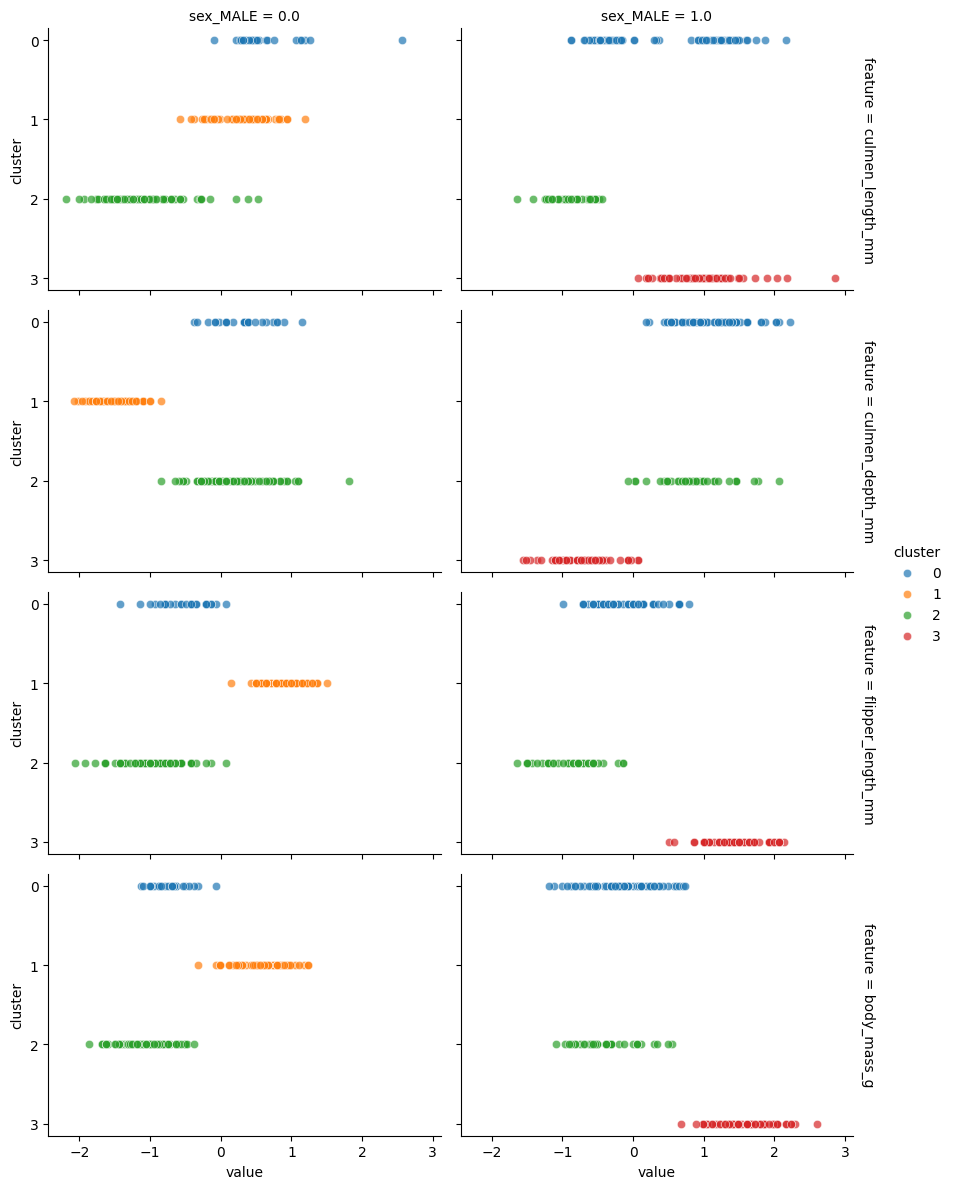

In [14]:
# create FacetGrid
g = sns.FacetGrid(penguins_melted,
                  col='sex_MALE',
                  row='feature',
                  hue='cluster',
                  margin_titles=True,
                  height=3, aspect=1.5)

g.map_dataframe(sns.scatterplot, x='value', y='cluster', alpha=0.7)
g.add_legend()

plt.show()